In [1]:
import numpy as np
A = np.array([
        [ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]
    ])

m,n = A.shape 

print("Array:")
print(A) 

print("---")
print("Dimensions:")
print(A.shape) 

print("---")
print("Mean across Rows:")
print(np.mean(A,axis=0))

Array:
[[ 3  7]
 [-4 -6]
 [ 7  8]
 [ 1 -1]
 [-4 -1]
 [-3 -7]]
---
Dimensions:
(6, 2)
---
Mean across Rows:
[0. 0.]


In [2]:
import pandas as pd
df = pd.DataFrame(A, columns = ['a0', 'a1'])
print(df)

   a0  a1
0   3   7
1  -4  -6
2   7   8
3   1  -1
4  -4  -1
5  -3  -7


In [3]:
df.values

array([[ 3,  7],
       [-4, -6],
       [ 7,  8],
       [ 1, -1],
       [-4, -1],
       [-3, -7]])

In [4]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

<ipython-input-5-22e8d845f857>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Dataset $A$')

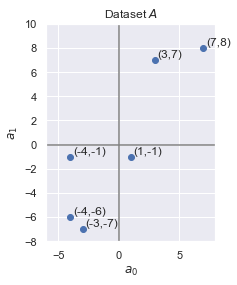

In [5]:
plt.scatter(A[:,0],A[:,1])   


for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))


plt.plot([-6,8],[0,0],'grey') 
plt.plot([0,0],[-8,10],'grey') 
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')


plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Dataset $A$")

In [6]:
a0 = A[:,0]
a1 = A[:,1]
product = a0*a1
print("Length of prod equals " + str(len(product)))
print("---")
print("Covariance:")
print(np.sum(product)/(m-1))

Length of prod equals 6
---
Covariance:
25.0


In [7]:
np.cov(a0,a1)

array([[20., 25.],
       [25., 40.]])

In [8]:
A.T

array([[ 3, -4,  7,  1, -4, -3],
       [ 7, -6,  8, -1, -1, -7]])

In [9]:
A.T @ A

array([[100, 125],
       [125, 200]])

In [10]:
Sigma = (A.T @ A)/(m-1) 
Sigma

array([[20., 25.],
       [25., 40.]])

In [11]:
l, X = np.linalg.eig(Sigma)
print("Eigenvalues:")
print(l)
print("---")
print("Eigenvectors:")
print(X)

Eigenvalues:
[ 3.07417596 56.92582404]
---
Eigenvectors:
[[-0.82806723 -0.56062881]
 [ 0.56062881 -0.82806723]]


In [12]:
print("Sigma times eigenvector:")
print(Sigma @ X[:,0])
print("Eigenvalue times eigenvector:")
print(l[0] * X[:,0]) 

Sigma times eigenvector:
[-2.54562438  1.72347161]
Eigenvalue times eigenvector:
[-2.54562438  1.72347161]


In [13]:
print("Sigma times eigenvector:")
print(Sigma @ X[:,1]) 
print("Eigenvalue times eigenvector:")
print(l[1] * X[:,1]) 

Sigma times eigenvector:
[-31.91425695 -47.13840945]
Eigenvalue times eigenvector:
[-31.91425695 -47.13840945]


In [14]:
print("The first principal component is eigenvector with largest evalue:")
print(X[:,1])
print("---")
print("Second principal component:")
print(X[:,0])

The first principal component is eigenvector with largest evalue:
[-0.56062881 -0.82806723]
---
Second principal component:
[-0.82806723  0.56062881]


In [15]:
X[:,1].T @ X[:,0]

0.0

<ipython-input-16-d747ce1260ca>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Eigenvectors of $\\Sigma$')

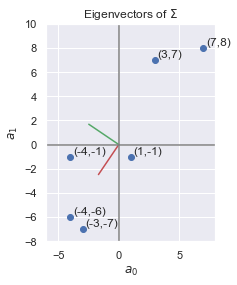

In [16]:
plt.scatter(A[:,0],A[:,1])
scale = 3 
plt.plot([0,X[0,1]*scale],[0,X[1,1]*scale],'r') # First principal component
plt.plot([0,X[0,0]*scale],[0,X[1,0]*scale],'g') # Second principal component


for i in range(m):
    plt.annotate('('+str(A[i,0])+','+str(A[i,1])+')',(A[i,0]+0.2,A[i,1]+0.2))


plt.plot([-6,8],[0,0],'grey') # x-axis
plt.plot([0,0],[-8,10],'grey') # y-axis
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')


plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Eigenvectors of $\Sigma$")

In [17]:
Amat = np.asmatrix(A)
Xmat = np.asmatrix(X)
Amat

matrix([[ 3,  7],
        [-4, -6],
        [ 7,  8],
        [ 1, -1],
        [-4, -1],
        [-3, -7]])

In [18]:
pc1 = Xmat[:,1]
pc1

matrix([[-0.56062881],
        [-0.82806723]])

In [19]:
Acomp = Amat @ pc1 
print("Compressed version of A:")
print(Acomp)

Compressed version of A:
[[ -7.47835704]
 [  7.21091862]
 [-10.54893951]
 [  0.26743842]
 [  3.07058247]
 [  7.47835704]]


In [20]:
Arec = Acomp @ pc1.T
print("Reconstruction from 1D compression of A:")
print(Arec)

Reconstruction from 1D compression of A:
[[ 4.1925824   6.1925824 ]
 [-4.04264872 -5.97112541]
 [ 5.9140394   8.73523112]
 [-0.14993368 -0.22145699]
 [-1.72145699 -2.54264872]
 [-4.1925824  -6.1925824 ]]


<ipython-input-21-7561a2399b35>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Reconstructing the 1D compression of $A$')

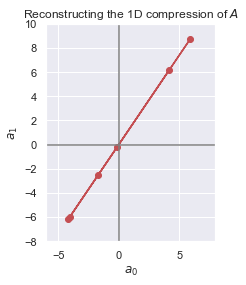

In [21]:
plt.plot(Arec[:,0],Arec[:,1],'r', marker='o') 


plt.plot([-6,8],[0,0],'grey') 
plt.plot([0,0],[-8,10],'grey') 
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')


plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Reconstructing the 1D compression of $A$")

In [22]:
print(np.linalg.matrix_rank(Amat)) 
print(np.linalg.matrix_rank(Arec))

2
1


In [23]:
Amat @ Xmat[:,1] @ Xmat[:,1].T + Amat @ Xmat[:,0] @ Xmat[:,0].T

matrix([[ 3.,  7.],
        [-4., -6.],
        [ 7.,  8.],
        [ 1., -1.],
        [-4., -1.],
        [-3., -7.]])

In [24]:
A @ Xmat @ Xmat.T

matrix([[ 3.,  7.],
        [-4., -6.],
        [ 7.,  8.],
        [ 1., -1.],
        [-4., -1.],
        [-3., -7.]])

<ipython-input-25-e3aec3a7620c>:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


Text(0.5, 1.0, 'Back to $A$')

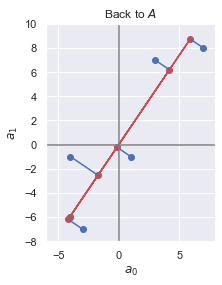

In [25]:
plt.scatter(A[:,0], A[:,1]) 
plt.plot(Arec[:,0],Arec[:,1],'r', marker='o') 


for i in range(m):
    e = np.vstack((A[i],Arec[i]))
    plt.plot(e[:,0],e[:,1],'b') 


plt.plot([-6,8],[0,0],'grey') 
plt.plot([0,0],[-8,10],'grey') 
plt.axis([-6, 8, -8, 10])
plt.axes().set_aspect('equal')


plt.xlabel("$a_0$")
plt.ylabel("$a_1$")
plt.title("Back to $A$")

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
data = pd.read_csv('glass.csv')

In [28]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [29]:
data.shape

(214, 10)

In [30]:
data['Index'] = np.arange(1,215)

In [31]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Index
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,2
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,3
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,4
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,5


In [32]:
data.isna().sum()

RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Type     0
Index    0
dtype: int64

In [33]:
data=data.drop(labels=['Index','Type'], axis=1)

In [34]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

In [36]:
df=pd.DataFrame(data=scaled_data, columns= data.columns)

In [37]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877449e-14,2.179980e-15,-2.801497e-16,-3.434428e-16,9.966067e-16,7.470660e-17,-3.137418e-16,-1.763906e-16,-6.121791e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


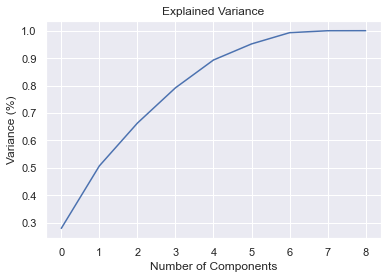

In [38]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()

In [39]:
pca = PCA(n_components=4)
new_data = pca.fit_transform(df)

principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])

In [40]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,1.151140,-0.529488,-0.372096,1.728901
1,-0.574137,-0.759788,-0.556708,0.760232
2,-0.940160,-0.929836,-0.554907,0.206254
3,-0.142083,-0.961677,-0.117125,0.415724
4,-0.351092,-1.091249,-0.485079,0.069102


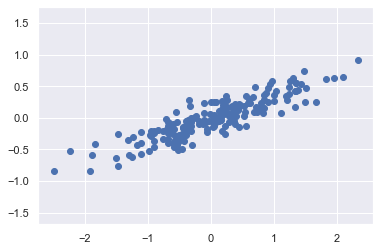

In [41]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[0.7625315 0.0184779]
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


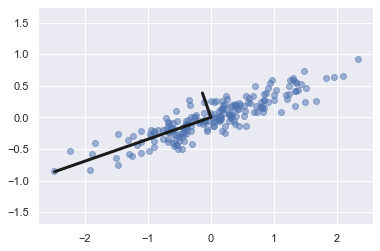

In [43]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

In [44]:
clf = PCA(0.95) 
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


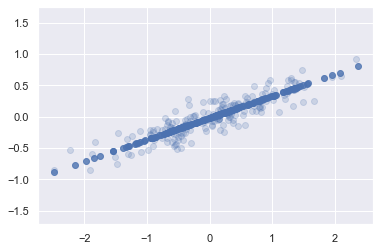

In [45]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

pca = PCA(2)  
Xproj = pca.fit_transform(X)
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


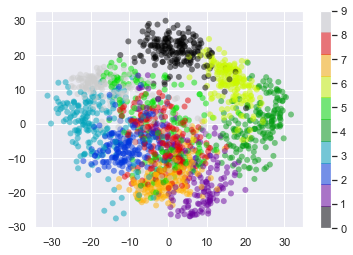

In [47]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

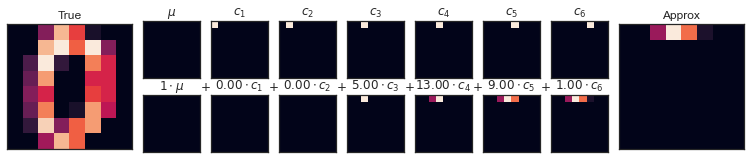

In [59]:
from fig_code.figures import plot_image_components

sns.set_style('white')
plot_image_components(digits.data[0])

In [60]:
from fig_code.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

interactive(children=(IntSlider(value=0, description='i', max=1796), Output()), _dom_classes=('widget-interact…

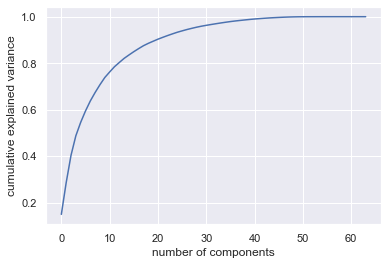

In [55]:
sns.set()
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

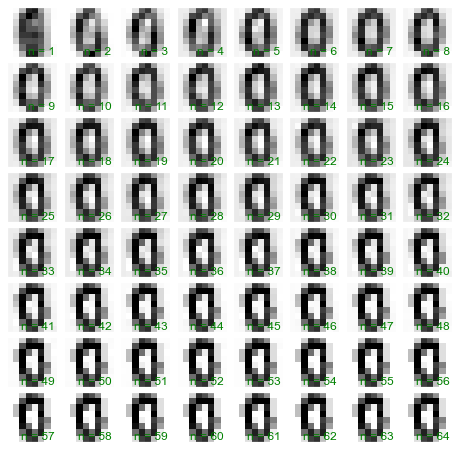

In [56]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In [57]:
from IPython.html.widgets import interact

def plot_digits(n_components):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=range(1, 64), nside=range(1, 8)) 

C:\Users\skme2\anaconda3\lib\site-packages\IPython\html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  warn("The `IPython.html` package has been deprecated since IPython 4.0. "


interactive(children=(Dropdown(description='n_components', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…

<function __main__.plot_digits(n_components)>